In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Transformation

In [4]:
# dropping unnecessary columns
df.drop(['Parch', 'PassengerId', 'Name', 'Ticket', 'Fare', 'SibSp','Cabin'], axis=1, inplace=True)

In [5]:
df['Pclass'] = df['Pclass'].map({1:'Luxury', 2:'Economy', 3:'Lower'})

In [6]:
df['Embarked'].fillna('S', inplace=True)

In [7]:
df['Embarked'] = df['Embarked'].map({'S':'Southampton', 'Q':'Queenstown', 'C':'Cherbourg'})

#### Visualisations

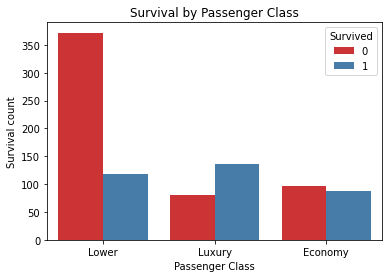

In [8]:
# Survival by passenger class
ax = sns.countplot(x='Pclass', hue='Survived', palette='Set1', data=df)
ax.set(xlabel='Passenger Class', ylabel='Survival count', title='Survival by Passenger Class')
plt.show()

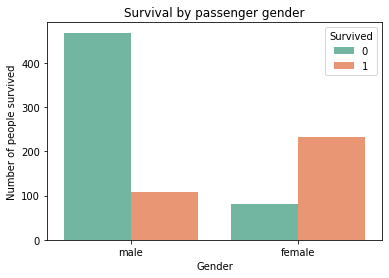

In [9]:
# Survival by gender of passenger
ax = sns.countplot(x='Sex', hue='Survived', palette='Set2', data=df)
ax.set(xlabel='Gender', ylabel='Number of people survived', title='Survival by passenger gender')
plt.show()

In [10]:
# Survival by age group
intervals = (0,18,35,60,120)
categories = ['Children', 'Adult', 'Middle-Aged', 'Senior Citizens']
df['Age-category'] = pd.cut(x=df['Age'], bins=intervals, labels=categories)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Age-category
0,0,Lower,male,22.0,Southampton,Adult
1,1,Luxury,female,38.0,Cherbourg,Middle-Aged
2,1,Lower,female,26.0,Southampton,Adult
3,1,Luxury,female,35.0,Southampton,Adult
4,0,Lower,male,35.0,Southampton,Adult


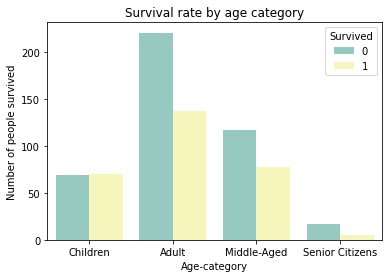

In [12]:
ax = sns.countplot(x='Age-category', hue='Survived', palette='Set3', data=df)
ax.set(ylabel='Number of people survived', title='Survival rate by age category')
plt.show()

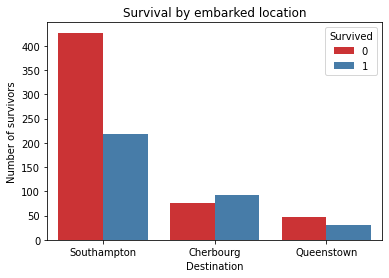

In [13]:
# Survival by embarked destination
ax = sns.countplot(x='Embarked', hue='Survived', palette='Set1', data=df)
ax.set(ylabel='Number of survivors', xlabel='Destination', title='Survival by embarked location')
plt.show()